[16543 26448   383]
[[ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] [-1. -1. -1. ..., -1. -1.  1.] [[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]] [-1. -1.  1. ..., -1. -1.  1.]
loss train: 3257.0
 loss test: 1629.0
total： 32561  error: 24720  acc rate: 0.2408095574460244
total： 16281  error: 12435  acc rate: 0.2362262760272711
loss train: 3205.61060336
 loss test: 1604.39689211
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 3140.98483935
 loss test: 1569.75823914
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 3082.92540792
 loss test: 

total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1587.8516941
 loss test: 802.188421738
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1515.79877151
 loss test: 785.885416396
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1616.74473009
 loss test: 795.800082286
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1507.8180269
 loss test: 736.658663037
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1599.41268961
 loss test: 753.952095192
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1557.32735449
 loss test: 827.437650248
total： 32561  erro

total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1580.57860866
 loss test: 693.091466903
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
loss train: 1521.59126717
 loss test: 746.205153926
total： 32561  error: 7841  acc rate: 0.7591904425539756
total： 16281  error: 3846  acc rate: 0.7637737239727289
Features: [-0.07156141913393016, -0.050546418766347655, -0.026680809962285005, -0.0070897589737979345, -0.027533993552907442, -0.10183842479611527, -0.027417566240365152, 0.0056158409266068906, -0.0027735540124956643, -0.016034965045496976, -0.0099516700689903908, -0.00063259684895018871, -0.00032520762413940064, -0.04344756014348506, -0.02808557513060092, -0.031662364628895809, -0.038800268010825582, -0.041416245938394228, 0.0016950723223771644, -0.048274680175498852, -0.014496457773610968, -0.06692334230505749, 0.0092588190041316965, -0.009536161853092

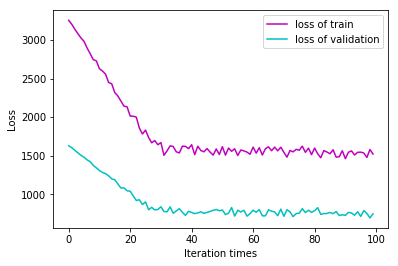

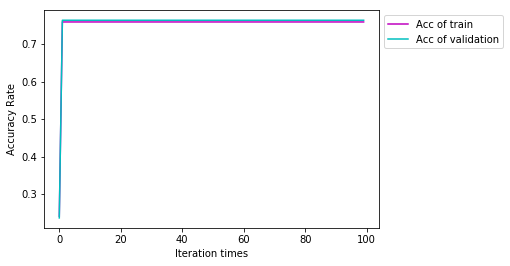

In [21]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math

eta = 0.0001 # Learning Rate
iter =100 # Iteration times
accuracy = 0.001 # If loss<accuracy , then stop iteration
lam = 0.1 #lambda used in Loss Function
mini_batch_percent = 0.1

m_train = 32561 # Amount of training data
m_test = 16281 # Amount of testing data
features=123 # Fearures of dataset

#Initialize arrays
w= [0]*features  #All zero initialization

#used to stastic and draw graph
iter_num = [0]*iter;
loss_train  = [0]*iter;
loss_test  = [0]*iter;
acc_train = [0]*iter;
acc_test = [0]*iter;

#used to calculate the step automatically
#delta_x = [0]*features
epsilon = 0.001
sum_of_x_squared = 0
sum_of_grad_squared = 0
current = 0

#Use to get dataset from file
def get_data():
    data_train = load_svmlight_file("dataset\\a9a",n_features=features)
    X_train = data_train[0].toarray()
    y_train = data_train[1]
    data_test = load_svmlight_file("dataset\\a9a.t",n_features=features)
    X_test = data_test[0].toarray()
    y_test = data_test[1]
    return X_train, y_train, X_test, y_test

#Use to split dataset and return
def split_data():
    X, y = get_data()
    X = X.toarray()
    return train_test_split( X, y, test_size=0.5, random_state=43)

#Loss function  
def loss(m,X,y):
    loss = 0.0
    for i in range (0,m):
        y_predict = 0
        for j in range(0,features):
            y_predict = y_predict + X[i][j] * w[j]
        if(y[i]*y_predict-1<0):
            loss += (1-y[i]*y_predict)
    for  j in range (0,features):
        loss = loss + 0.5 * lam * w[j] * w[j]
    return loss

#mini -batch loss function  
def SGD_loss(m,X,y):
    loss = 0.0
    sample_num =math.ceil( m * mini_batch_percent)
    target = np.random.permutation(m)[0:sample_num]
    for index in range (0,sample_num):
        i = target[index]
        y_predict = 0
        for j in range(0,features):
            y_predict = y_predict + X[i][j] * w[j]
        if(y[i]*y_predict-1<0):
            loss += (1-y[i]*y_predict)
    for  j in range (0,features):
        loss = loss + 0.5 * lam * w[j] * w[j]
    return loss


#Derivative the Loss function to get Gradient(G)
def derivative(m,X,y):
    y_predict = [0]*m 
    for i in range (0,m):
        y_predict[i] = 0
        for j in range(0,features):
            y_predict[i] = y_predict[i] + X[i][j] * w[j]
    
    grad = [0] * features
    for j in range(0,features):
        grad[j] = abs(lam*w[j])
        for i in range(0,m):
            if(y[i]*y_predict[i]-1<0):
                grad[j] = grad[j] - y[i] * X[i][j]
    return grad

#Derivative the Loss function to get Gradient(G)
def derivative_random(m,X,y):
    i = random.randint(0,m-1)
    y_predict = 0
    for j in range(0,features):
        y_predict = y_predict + X[i][j] * w[j]
    
    grad = [0] * features
    for j in range(0,features):
        grad[j] = abs(lam*w[j])
        if(y[i]*y_predict-1<0):
             grad[j] = grad[j] - y[i] * X[i][j]
    
    return grad

#Process Gradient descent to minimum the Loss
def update_random(m,X,y):
    # grad is the gradient G
    grad = derivative_random(m,X,y)
    delta_of_grad = delta_x(grad)
    for j in range(0,features):
         #" D = -G " is " - grad[j] " here
        w[j] = w[j] + delta_of_grad[j]

def  squared(vector):
    a = np.mat(vector)
    b = a*a.T
    return b[0][0]

def multiply(vector1,vector2):
    c= [0]*len(vector1)
    for i in range(0,len(vector1)):
        c[i] = vector1[i] * vector2[i]
    return c
        
def delta_x(grad):
    return adadelta(grad)

def adadelta(grad):
    global sum_of_grad_squared, sum_of_x_squared, current
    
    delta_x = [0]*features
    sum_of_grad_squared += squared(grad)
    
    if(current==0):
        current+=1
        delta_x =[ x * -0.0001 for x in grad ]
    else:
        RMS_delta_x = math.sqrt(sum_of_x_squared/current)
        RMS_grad = math.sqrt(sum_of_grad_squared/(current+1))
        eta = -1.0 * ( RMS_delta_x / RMS_grad)
        delta_x =[ x * eta for x in grad ]
        current+=1
    sum_of_x_squared += squared(delta_x)
   # print("delta_x:",delta_x)
    return delta_x
    
    
#Train and validate 
def trainAndTest():
    for i in range (0,iter):
        iter_num[i] = i;
        
                
        loss_train[i] = SGD_loss(m_train,X_train,y_train)
        print("loss train:",loss_train[i]);
        
        loss_test[i] = SGD_loss(m_test,X_test,y_test)
        print(" loss test:",loss_test[i]);
        
        acc_train[i] = accRate(m_train,X_train,y_train)
        acc_test[i] = accRate(m_test,X_test,y_test)
            
        for j in range (0,100):
            update_random(m_train,X_train,y_train)
        
        
#The linear model
def predict(x):
    pre = 0.0
    for j in range (0,features):
        pre = pre + x[j] * w[j]
    if(pre>=0) :
        return 1
    else:
        return -1

def accRate(m,X,y):
    error = 0
    for i in range(0,m):
        if(predict(X[i])!=y[i]):
            error+=1
    print("total：",m," error:",error," acc rate:",1.0 - error/m )
    return 1.0 - error/m
    

#Test
print(np.random.permutation(m_train)[0:3])
    
#Main 
X_train, y_train, X_test,y_test = get_data()
print(X_train, y_train, X_test,y_test)
trainAndTest()


#Print the information and draw graphs
print("Features:",w)
fig, ax = plt.subplots()
ax.plot(iter_num, loss_train,color = 'm', label='loss of train')
ax.plot(iter_num, loss_test, color = 'c', label='loss of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax.set_xlabel('Iteration times')
ax.set_ylabel('Loss')
plt.show()  

fig2, ax2 = plt.subplots()
ax2.plot(iter_num, acc_train,color = 'm', label='Acc of train')
ax2.plot(iter_num, acc_test, color = 'c', label='Acc of validation')
plt.legend(bbox_to_anchor=[1, 1])  
ax2.set_xlabel('Iteration times')
ax2.set_ylabel('Accuracy Rate')
plt.show()
        
